In [29]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
wmap = hp.read_map('wmap_ilc_7yr_v4.fits')
# wmap_mollweide = hp.read_map('wmap_mollweide_ilc_7yr_v4.fits')
# wmap_zea = hp.read_map('wmap_zea_ilc_7yr_v4.fits')

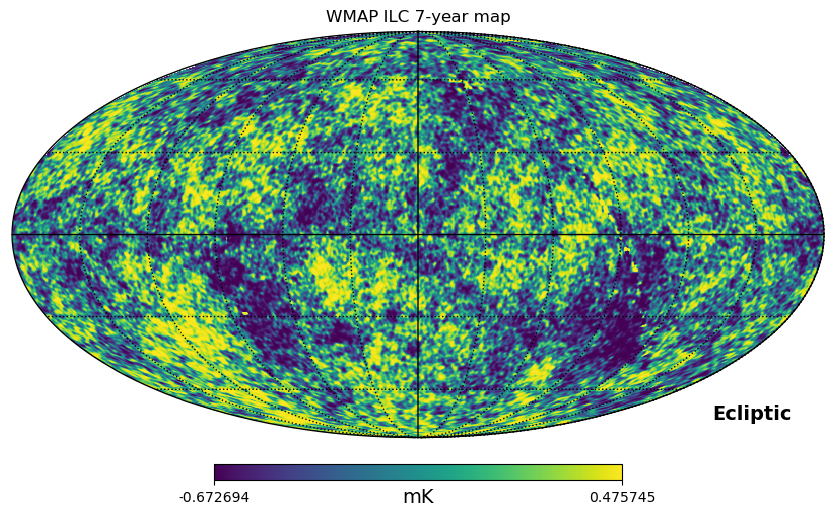

In [ ]:
hp.mollview(wmap, title='WMAP ILC 7-year map', unit='mK', coord=['G', 'E'], norm='hist')
hp.graticule()

In [26]:
nside = 32
wmap = hp.pixelfunc.ud_grade(map_in=wmap, nside_out=nside)

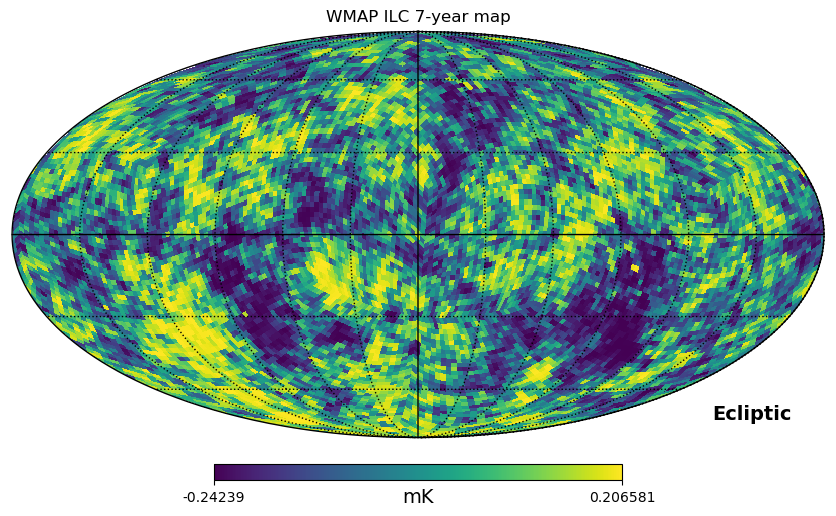

In [22]:
hp.mollview(wmap, title='WMAP ILC 7-year map',
            unit='mK', coord=['G', 'E'], norm='hist')
hp.graticule()

In [32]:
LMAX = 4*nside
cl = hp.anafast(wmap, lmax=LMAX)
ell = np.arange(len(cl))

<>:3: SyntaxWarning: "\e" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\e"? A raw string is also an option.
<>:4: SyntaxWarning: "\e" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\e"? A raw string is also an option.
<>:3: SyntaxWarning: "\e" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\e"? A raw string is also an option.
<>:4: SyntaxWarning: "\e" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\e"? A raw string is also an option.
/var/folders/rs/w1_w_dfd5v3cjbx220100ydh0000gn/T/ipykernel_8962/1438154512.py:3: SyntaxWarning: "\e" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\e"? A raw string is also an option.
  plt.xlabel("$\ell$")
/var/folders/rs/w1_w_dfd5v3cjbx220100ydh0000gn/T/ipykernel_8962/1438154512.py:4: SyntaxWarning: "\e" is an invalid escape sequence. Such 

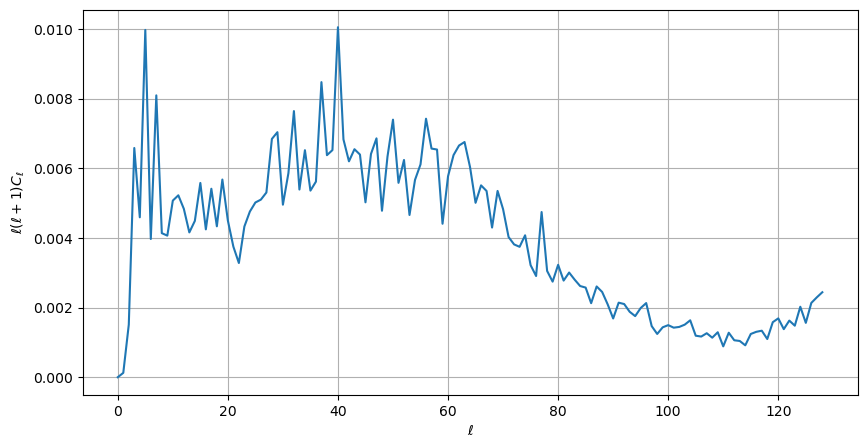

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(ell, ell * (ell + 1) * cl)
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}$")
plt.grid()
# hp.write_cl("cl.fits", cl, overwrite=True)